# Description

This notebook provides a comprehensive analysis of Tesla (TSLA) and GameStop (GME) stock data and revenue information. Using Python libraries such as yfinance, requests, BeautifulSoup, pandas, and matplotlib.

# Table of Contents

- Install Necessary Libraries
- Module
- Definition
- Question 1: Use yfinance to Extract Stock Data
- Question 2: Use Webscraping to Extract Tesla Revenue Data
- Question 3: Use yfinance to Extract Stock Data
- Question 4: Use Webscraping to Extract GME Revenue Data
- Question 5: Plot Tesla Stock Graph
- Question 6: Plot GameStop Stock Graph

# Install Necessary Libraries

In [1]:
!pip install yfinance
!pip install pandas requests beautifulsoup4 jupyter
!pip install matplotlib

# Module

In [2]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Definition

Define function to fetch revenue data

In [3]:
def fetch_revenue_data(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Check for request errors

    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', {'class': 'table'})
    if table is None:
        raise ValueError("Table not found on the page")

    header_row = table.find('thead')
    headers = [th.text.strip() for th in header_row.find_all('th')] if header_row else []

    data = []
    for row in table.find_all('tr')[1:]:  # Skip the header row
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        data.append(cols)

    if len(headers) != len(data[0]):
        if len(headers) == 1 and len(data[0]) == 2:
            headers = ['Year', 'Revenue']

    df = pd.DataFrame(data, columns=headers)
    df['Revenue'] = df['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float, errors='ignore')

    return df

Define the make_graph Function

In [4]:
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Question 1: Use yfinance to Extract Tesla Stock Data

In [5]:
# Define the ticker symbol for Tesla
ticker_symbol = 'TSLA'

# Create a Ticker object for Tesla
tesla = yf.Ticker(ticker_symbol)

# Fetch Tesla stock data for the maximum available period
tesla_data = tesla.history(period="max")

# Reset the index to turn the date into a column
tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2: Use Webscraping to Extract Tesla Revenue Data

In [6]:
# Fetch Tesla revenue data
tesla_revenue_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
tesla_revenue_df = fetch_revenue_data(tesla_revenue_url)
print("\nTesla Revenue Data:")
tesla_revenue_df.tail()


Tesla Revenue Data:


,Year,Revenue
10,2013,2013.0
11,2012,413.0
12,2011,204.0
13,2010,117.0
14,2009,112.0


# Question 3: Use yfinance to Extract GME Stock Data

In [7]:
# Define the ticker symbol for GME
gme_symbol = 'GME'

# Create a Ticker object for GME
gme = yf.Ticker(gme_symbol)

# Fetch GME stock data for the maximum available period
gme_data = gme.history(period="max")

# Reset the index to turn the date into a column
gme_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Use Webscraping to Extract GME Revenue Data

In [8]:
# Fetch GameStop revenue data
gme_revenue_url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
gme_revenue_df = fetch_revenue_data(gme_revenue_url)
print("\nGME Revenue Data:")
gme_revenue_df.tail()


GME Revenue Data:


,Year,Revenue
11,2013,8887.0
12,2012,9551.0
13,2011,9474.0
14,2010,9078.0
15,2009,8806.0


# Question 5: Plot Tesla Stock Graph

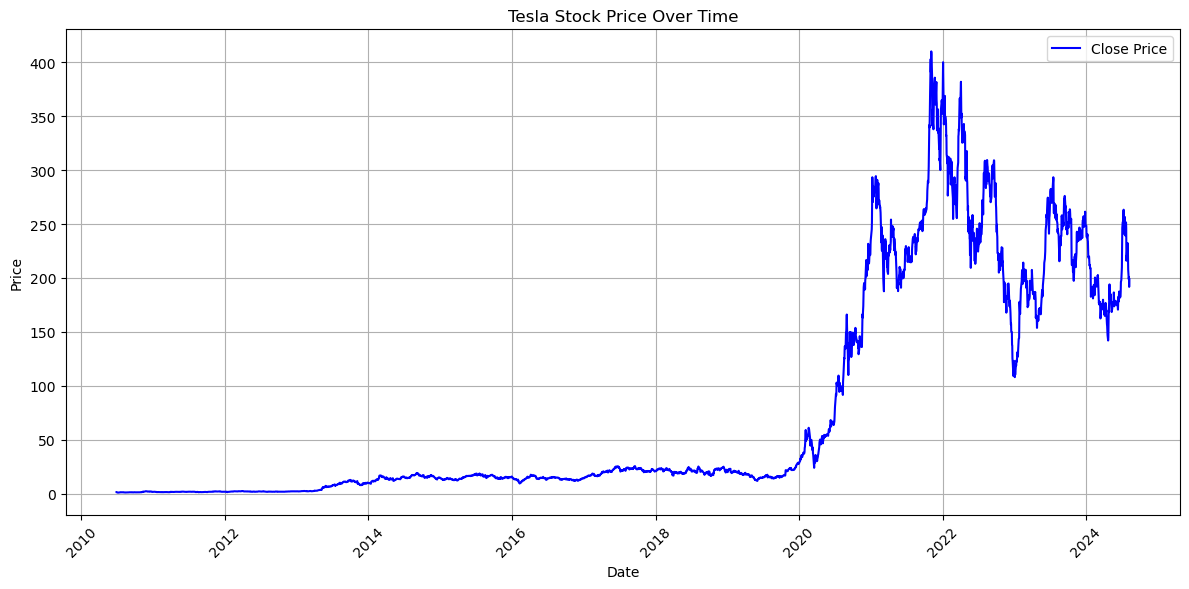

In [9]:
# Plot Tesla Stock Graph
make_graph(tesla_data, 'Tesla Stock Price Over Time')

# Question 6: Plot GameStop Stock Graph

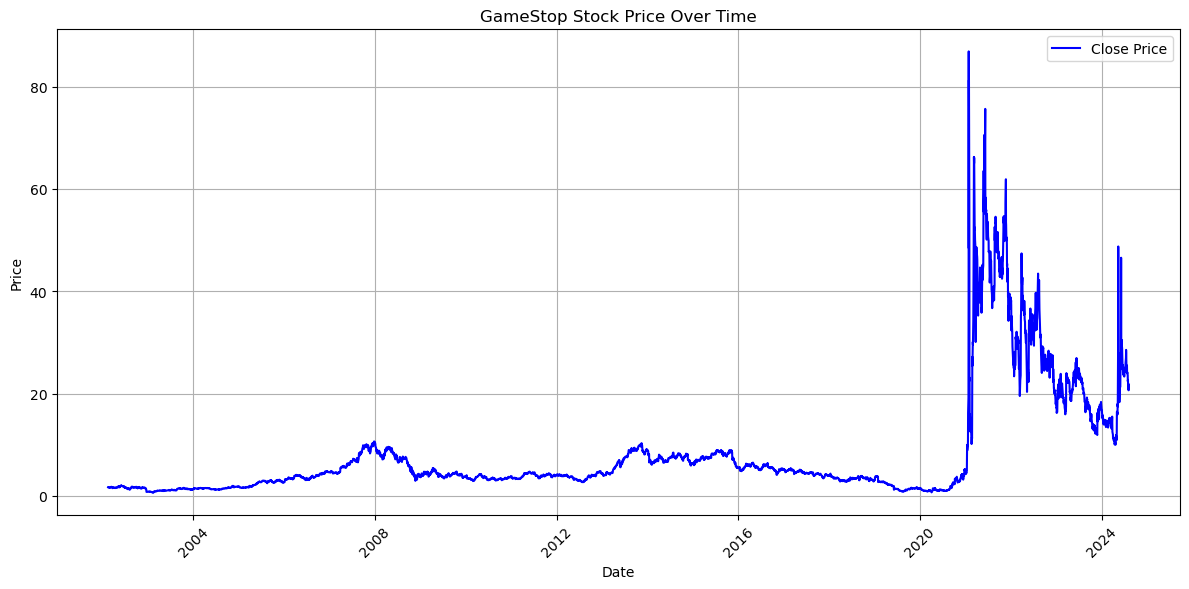

In [10]:
# Plot GameStop Stock Graph
make_graph(gme_data, 'GameStop Stock Price Over Time')